In [ ]:
# importo librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ingesto datos
df = pd.read_csv('/content/telco_churn_clusterai.csv')
df.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes
5,5,9305-CDSKC,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,NaN,Electronic check,99.65,820.5,Yes
6,6,1452-KIOVK,Male,0.0,NaN,Yes,22.0,Yes,Yes,Fiber optic,...,No,No,Yes,No,NaN,Yes,Credit card (automatic),89.10,1949.4,No
7,7,6713-OKOMC,NaN,0.0,No,No,10.0,No,No phone service,DSL,...,No,No,No,No,NaN,NaN,Mailed check,29.75,301.9,No
8,8,7892-POOKP,NaN,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,9,6388-TABGU,Male,0.0,No,Yes,62.0,NaN,No,DSL,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# shape
print("Dim " + str(np.shape(df)) + ".\nEl dataset importado tiene "+ str(np.shape(df)[1]) + " dimensiones y " + str(np.shape(df)[0]) + " instancias.")

Dim (7043, 22).
El dataset importado tiene 22 dimensiones y 7043 instancias.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            6127 non-null   object 
 3   SeniorCitizen     6127 non-null   float64
 4   Partner           6127 non-null   object 
 5   Dependents        6127 non-null   object 
 6   tenure            6127 non-null   float64
 7   PhoneService      6127 non-null   object 
 8   MultipleLines     6127 non-null   object 
 9   InternetService   6127 non-null   object 
 10  OnlineSecurity    6127 non-null   object 
 11  OnlineBackup      6127 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          5846 non-null   object 


In [ ]:
# dropeo ids
df = df.drop(columns=['Unnamed: 0', 'customerID'])

In [ ]:
# ajusto tipo de datos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6127 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           6127 non-null   object 
 3   Dependents        6127 non-null   object 
 4   tenure            6127 non-null   float64
 5   PhoneService      6127 non-null   object 
 6   MultipleLines     6127 non-null   object 
 7   InternetService   6127 non-null   object 
 8   OnlineSecurity    6127 non-null   object 
 9   OnlineBackup      6127 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          5846 non-null   object 
 15  PaperlessBilling  5846 non-null   object 
 16  PaymentMethod     5846 non-null   object 


In [ ]:
# calculo el porcentaje de valores nulos para cada columna
null_percentage = df.isnull().sum() / len(df) * 100
print("Porcentaje de nulos por variable:")
print(null_percentage[null_percentage > -1].sort_values(ascending=False))

Porcentaje de nulos por variable:
PaperlessBilling    16.995598
Contract            16.995598
MonthlyCharges      16.995598
PaymentMethod       16.995598
OnlineBackup        13.005821
Dependents          13.005821
Partner             13.005821
gender              13.005821
tenure              13.005821
PhoneService        13.005821
MultipleLines       13.005821
InternetService     13.005821
OnlineSecurity      13.005821
TotalCharges         0.156183
SeniorCitizen        0.000000
DeviceProtection     0.000000
TechSupport          0.000000
StreamingMovies      0.000000
StreamingTV          0.000000
Churn                0.000000
dtype: float64


In [ ]:
# visualizo la distribución de las categorías para cada columna
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nDistribution for column: {col}")
    # Display value counts, including nulls
    print(df[col].value_counts(dropna=False).to_string())


Distribution for column: gender
gender
Male      3082
Female    3045
NaN        916

Distribution for column: SeniorCitizen
SeniorCitizen
0.0    5137
1.0     990
nan     916

Distribution for column: Partner
Partner
No     3172
Yes    2955
NaN     916

Distribution for column: Dependents
Dependents
No     4294
Yes    1833
NaN     916

Distribution for column: PhoneService
PhoneService
Yes    5527
NaN     916
No      600

Distribution for column: MultipleLines
MultipleLines
No                  2954
Yes                 2579
NaN                  916
No phone service     594

Distribution for column: InternetService
InternetService
Fiber optic    2683
DSL            2101
No             1343
NaN             916

Distribution for column: OnlineSecurity
OnlineSecurity
No                     3012
Yes                    1783
No internet service    1332
NaN                     916

Distribution for column: OnlineBackup
OnlineBackup
No                     2669
Yes                    2110
No inte

In [ ]:
# calculo el porcentaje de filas que tienen algún valor nulo
rows_with_nulls = df.isnull().any(axis=1).sum()
total_rows = len(df)
percentage_rows_with_nulls = (rows_with_nulls / total_rows) * 100
print(f"Porcentaje de filas con al menos un valor nulo: {percentage_rows_with_nulls:.2f}%")

Porcentaje de filas con al menos un valor nulo: 86.26%


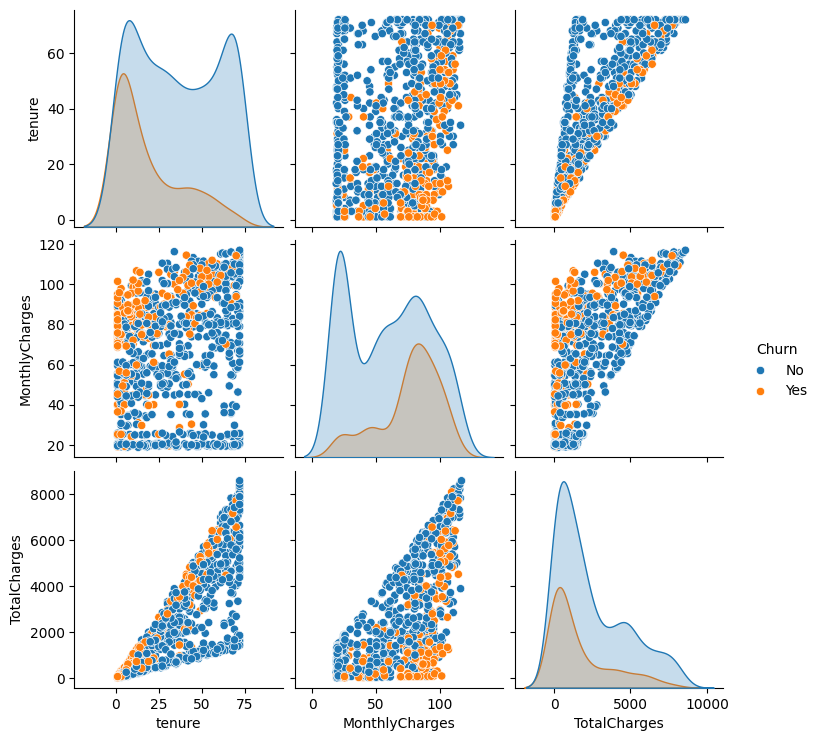

In [ ]:
# visualizo un pairplot de las variables numéricas (excluyendo nulos) en función de su valor "churn"
sns.pairplot(df.dropna(), hue='Churn')

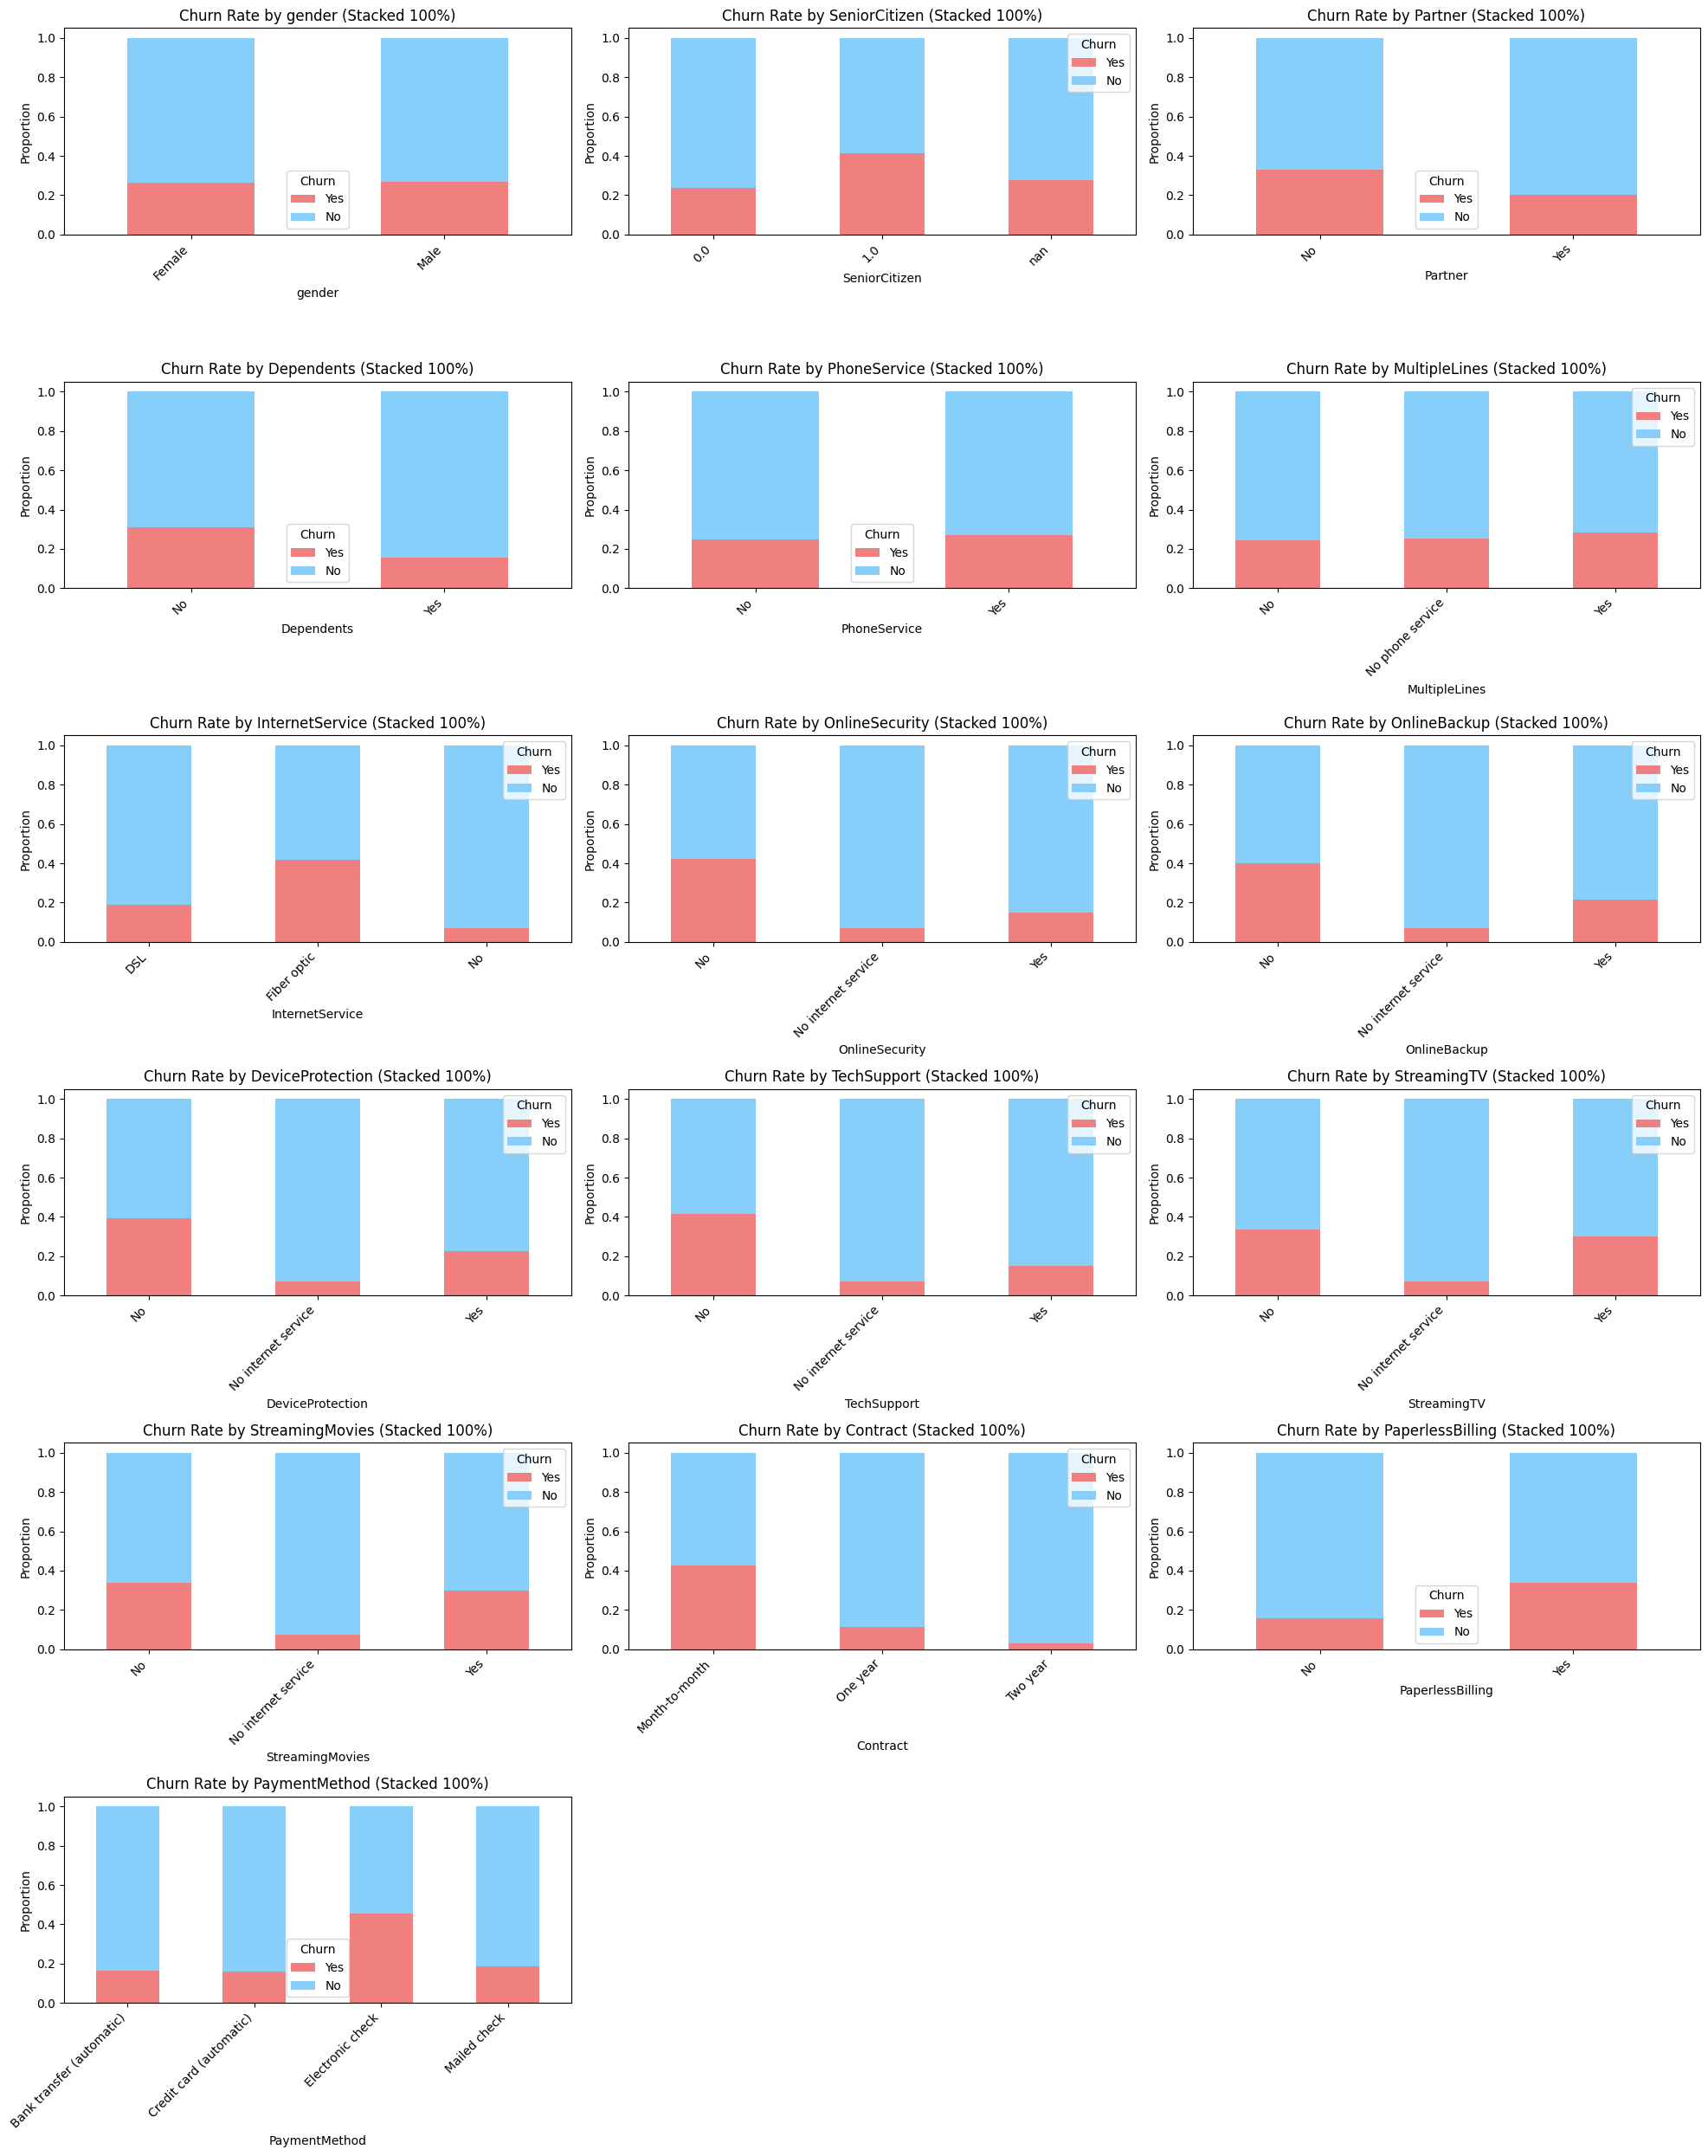

In [ ]:
# visualizo la proporción que representa el valor churn para cada categoría de las columnas categóricas
plt.figure(figsize=(20, 25))

categorical_cols_for_plot = [c for c in categorical_cols if c != 'Churn']

for i, col in enumerate(categorical_cols_for_plot):
    plt.subplot(6, 3, i + 1)

    # Handle SeniorCitizen separately as it's float and needs to be treated as categorical
    if col == 'SeniorCitizen':
        df_plot = df.copy()
        df_plot[col] = df_plot[col].astype(str)
        crosstab_data = pd.crosstab(df_plot[col], df_plot['Churn'], normalize='index')
    else:
        crosstab_data = pd.crosstab(df[col], df['Churn'], normalize='index')

    # Reorder columns for descending Churn legend (Yes, No) and assign custom colors
    crosstab_data = crosstab_data[['Yes', 'No']]

    crosstab_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'lightskyblue'])
    plt.title(f'Churn Rate by {col} (Stacked 100%)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()

# Además, podemos calcular el porcentaje de Churn para cada categoría
#print("\nPorcentaje de Churn por Categoría:")
#for col in [c for c in categorical_cols if c != 'Churn']:
#    if col == 'SeniorCitizen':
#        churn_rates = df.groupby(df[col].astype(str))['Churn'].value_counts(normalize=True).unstack().round(2)
#    else:
#        churn_rates = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().round(2)
#    print(f"\n{col}:")
#    print(churn_rates)
